In [1]:
from __future__ import print_function, division   # Python 2/3 compatibility
from skimage import io                            # utilities to read and write images in various formats
import numpy as np  # array manipulation package
import matplotlib.pylab as plt                    # plotting package
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,10)         # set default figure size
plt.rcParams['image.cmap'] = 'gray'               # set default colormap to gray

# Assignment 3 : Frequency domain processing

The following progamming assignment involves the task of image filtering in the frequency domain, such as, highpass, lowpass and bandpass filtering.

**Please, follow carefully the submission instructions given in the end of this notebook.** You are encouraged to seek information in other places than the course book and lecture material but remember **list all your sources under references**.

If you experience problems that you cannot solve using the course material or the Python documentation, or have any questions regarding the programming assignments, please do not hesitate to contact the course assistant by sending an e-mail at dip@unioulu.oulu.fi. You can also join in for the Q & A session (schedule is given on the course page in Moodle) for this assignment.

**Please, fill in your personal details below.**

# Personal details:

* **Name(s) and student ID(s):** 
Student: Name - Nirzor Talukder; 
Student Id - 2207845

* **Contact information:** 
email Address - 1: nirzor.talukder@student.oulu.fi

# 1. Image transforms : lowpass and highpass filtering in frequency domain

In the following, you will first perform ideal lowpass and highpass filtering on the test image, and later, we will also consider the Gaussian lowpass and highpass filtering. First, read the part concerning image enhancement in frequency domain in the lecture notes or in the course book. Specifically, you should look at the **Chapter-4** (available as a PDF file) in the lecture notes in Moodle.

Now, perform the following operations in the reserved code cells and answer to the questions written in bold into the reserved spaces.


**1.1. Read and display the test image `hplptest.jpg`.**

(np.float64(-0.5), np.float64(499.5), np.float64(499.5), np.float64(-0.5))

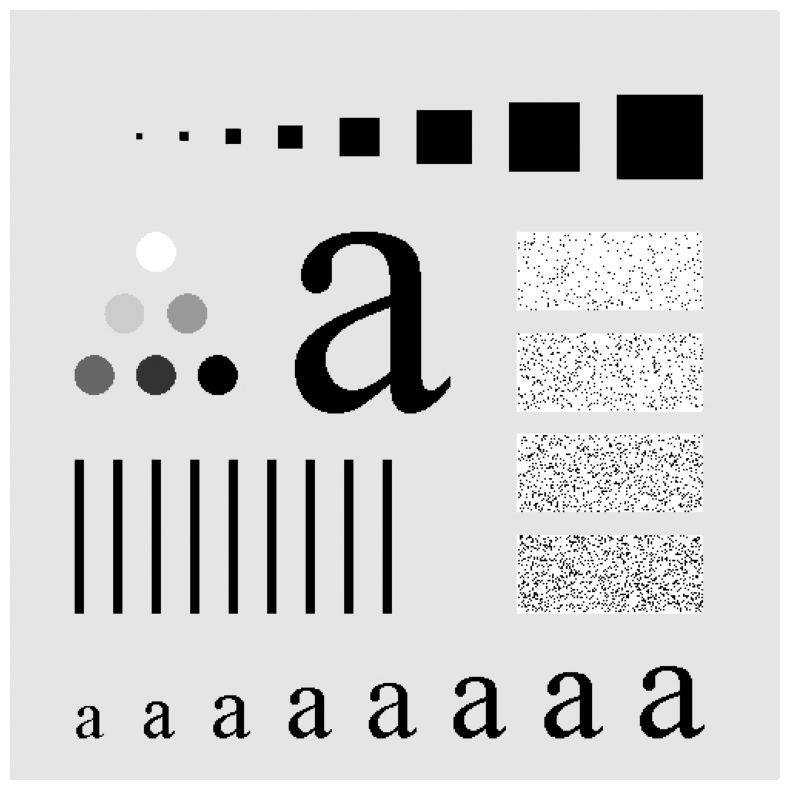

In [2]:
# read test image
image = (io.imread('hplptest.jpg', as_gray = True))

# display test image
plt.imshow(image)
plt.axis('off')

**1.2. Compute the Fourier transform (FT) of the test image and take a look at what the magnitude of the FT looks like.**

Hint: When plotting the FTs, use logarithmic graylevel transformation to make the result more illustrative for human visual system: 

`>>> np.log(np.abs(image_fft)+1)`

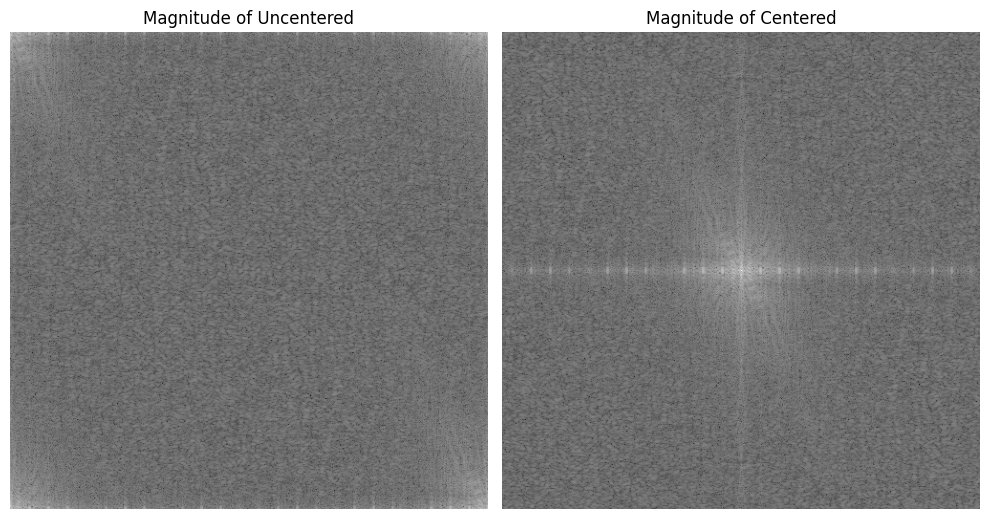

In [3]:
from scipy import fftpack

# compute the FT of the test image using 'fftpack.fft2'

fourier_transform = fftpack.fft2(image)#np.fft.fft2(image)

# translate the origin of the FT (low frequencies) to the center using 'fftpack.fftshift'

translated_fourier_transform = fftpack.fftshift(fourier_transform)#np.fft.fftshift(fourier_transform)

# display the magnitude of the uncentered and centered FT using 'imshow'.
magnitude_uncentered = np.abs(fourier_transform)
magnitude_centered = np.abs(translated_fourier_transform)

fig, ax = plt.subplots(1, 2)

ax[0].imshow(np.log(magnitude_uncentered + 1.0))
ax[0].set_title('Magnitude of Uncentered')
ax[0].axis('off')

ax[1].imshow(np.log(magnitude_centered + 1.0))
ax[1].set_title('Magnitude of Centered')
ax[1].axis('off')
fig.tight_layout()

**The code for constructing an ideal lowpass filter is given below:**

In [4]:
# make two frequency matrices, 'f1' and 'f2', as help variables (frequencies from -1 to 1)
n = (500,500)
f1 = ( np.arange(0,n[0])-np.floor(n[0]/2) ) * (2./(n[0]))
f2 = ( np.arange(0,n[1])-np.floor(n[1]/2) ) * (2./(n[1]))
f1, f2 = np.meshgrid(f1, f2)

# make a matrix with absolute values of frequency (“sampled” frequency domain)
D = np.sqrt(f1**2 + f2**2)

# set cut-off frequency D0 to 0.2
D0 = 0.2;

# filter matrix is initialized to ones 
Hlp = np.ones(n)

# set frequencies in filter mask Hlp greater than the cut-off frequency D0 to zero, other elements remain unaltered
Hlp[D>D0] = 0.0

**1.3. Modify the lowpass filter code and construct ideal highpass filter `Hhp` with the same cut-off frequency `D0=0.2` and display both ideal lowpass and highpass filter masks in the same figure.**

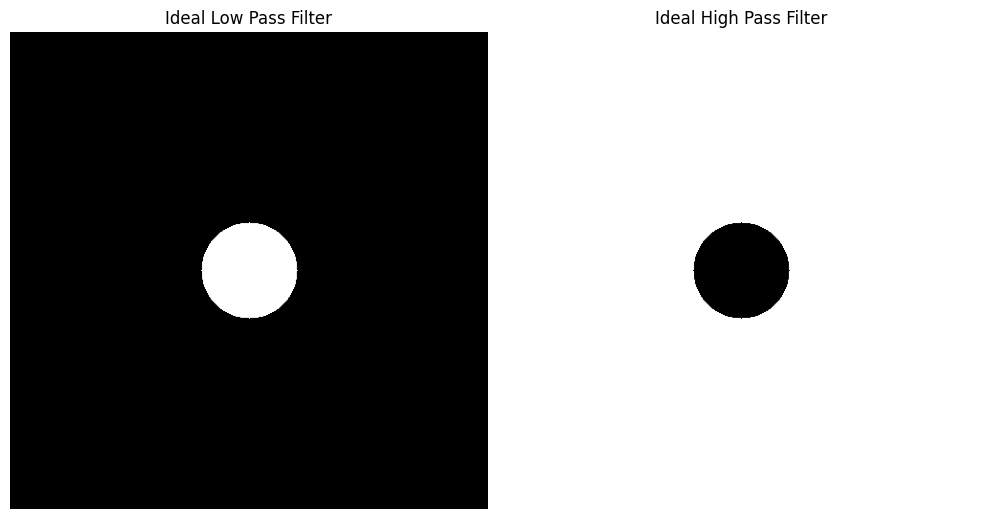

In [5]:
# create ideal highpass filter mask Hhp
Hhp = 1 - Hlp

# display the filters

fig, ax = plt.subplots(1, 2)

ax[0].imshow(Hlp) #(np.fft.fftshift(Hlp))
ax[0].set_title('Ideal Low Pass Filter')
ax[0].axis('off')

ax[1].imshow(Hhp) #(np.fft.fftshift(Hhp))
ax[1].set_title('Ideal High Pass Filter')
ax[1].axis('off')
fig.tight_layout()

**1.4. Perform ideal lowpass and highpass filtering in the frequency domain by multiplying the centralized FT of the original image with the `Hlp` and `Hhp` filter masks (element-per-element matrix multiplication) and display the two resulting FTs in the same figure.**

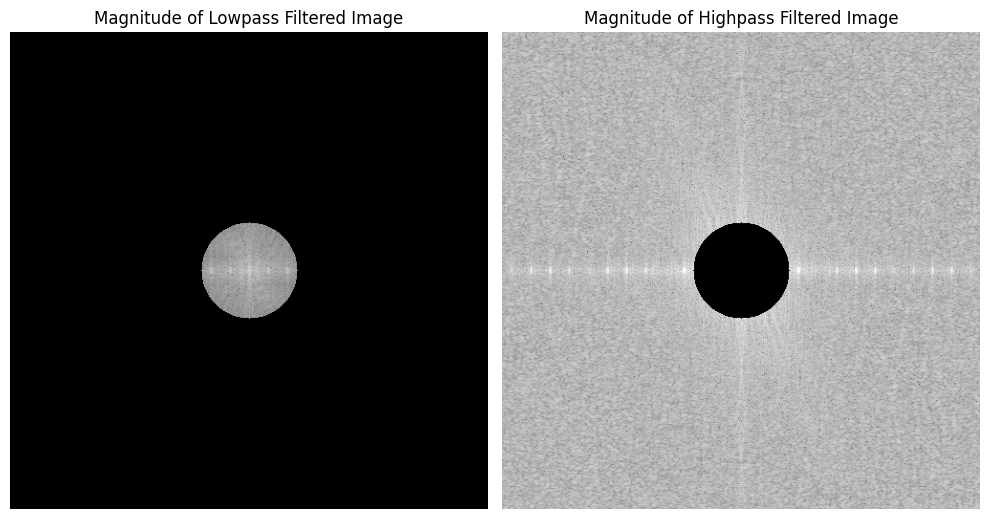

In [6]:
# apply ideal lowpass and highpass filtering to the test image, i.e. multiply element-wise the fft of the image with the filter masks

lowpass_filtered = translated_fourier_transform*Hlp

highpass_filtered = translated_fourier_transform*Hhp

# display the magnitude of the resulting FTs
magnitude_lowpass_filtered = np.abs(lowpass_filtered)
magnitude_highpass_filtered = np.abs(highpass_filtered)

fig, ax = plt.subplots(1, 2)

ax[0].imshow(np.log(magnitude_lowpass_filtered + 1.0))
ax[0].set_title('Magnitude of Lowpass Filtered Image')
ax[0].axis('off')

ax[1].imshow(np.log(magnitude_highpass_filtered + 1.0))
ax[1].set_title('Magnitude of Highpass Filtered Image')
ax[1].axis('off')
fig.tight_layout()

**1.5. Reconstruct the filtered images with `fftpack.ifft2()` and `fftpack.ifftshift()` in reverse order and display the two filtered images using `imshow()` in the same figure.** 

Hint: Due to round-off errors, you have to take the real part of the result of inverse FT before displaying it with `imshow()`. Please note also that the resulting images values beyond the original `uint8` image `[0,255]`, so you need to clip these values using `np.clip()`.

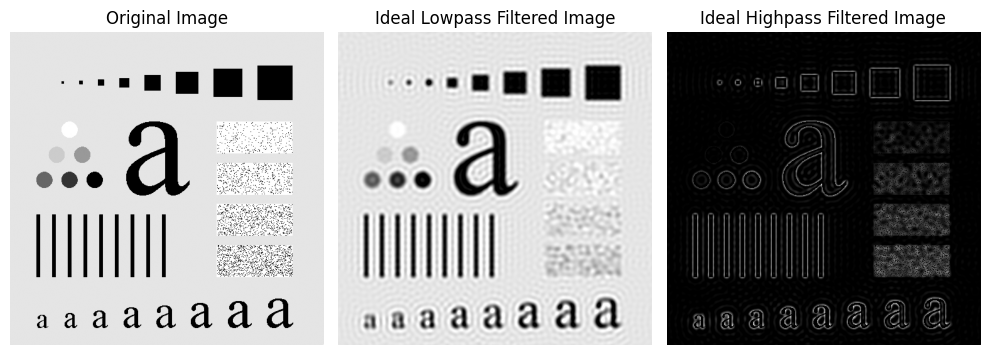

In [7]:
# reconstruct the filtered images
lowpass_reconstructed_filtered_image = fftpack.ifft2(fftpack.ifftshift(lowpass_filtered))#np.fft.ifft2(np.fft.ifftshift(lowpass_filtered))
highpass_reconstructed_filtered_image =  fftpack.ifft2(fftpack.ifftshift(highpass_filtered))#np.fft.ifft2(np.fft.ifftshift(highpass_filtered))

# take the 'real' part of the resulting images due to possible round-off errors
lowpass_reconstructed_real_image = lowpass_reconstructed_filtered_image.real
highpass_reconstructed_real_image = highpass_reconstructed_filtered_image.real

# clip values beyond the uint8 range [0,255] 
lowpass_reconstructed_real_clipped_image = lowpass_reconstructed_real_image.clip(0,255)
highpass_reconstructed_real_clipped_image = highpass_reconstructed_real_image.clip(0,255)

# display the original image and its lowpass and highpass filtered images in the same figure
fig, ax = plt.subplots(1, 3)

ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(lowpass_reconstructed_real_clipped_image)
ax[1].set_title('Ideal Lowpass Filtered Image')
ax[1].axis('off')

ax[2].imshow(highpass_reconstructed_real_clipped_image)
ax[2].set_title('Ideal Highpass Filtered Image')
ax[2].axis('off')

fig.tight_layout()

When performing ideal lowpass and highpass filtering, unwanted artefacts appear to the filtered image. **What is this phenomenon called and why does it occur?**

`The unwanted artifacts appearing in an image after ideal lowpass and highpass filtering is called ringing effect. This occurs because ideal filters have sharp cut-off frequencies, which means that they completely eliminate or retain all frequencies below or above a certain threshold. However, in the process of eliminating or retaining these frequencies, the filters introduce ripples or oscillations in the image that are not present in the original image. These ripples or oscillations are known as ringing.`

`The ringing can be explained mathematically as the result of the truncation of a Fourier series or a Fourier transform. When a Fourier series or transform is truncated, the discontinuities at the edges of the truncated region cause the overshoots or oscillations that are observed in the filtered image. (Digital Image Processing book)`

**1.6. Now, construct Gaussian lowpass and highpass filters with cut-off frequency `D0=0.2` and display them in the same figure.**

Hint: All you need to do is to modify the filter matrix `Hlp` line in the example code snippet accordingly to form `Hlpg` and `Hhpg` (see the lecture notes, **chapter04.pdf**).

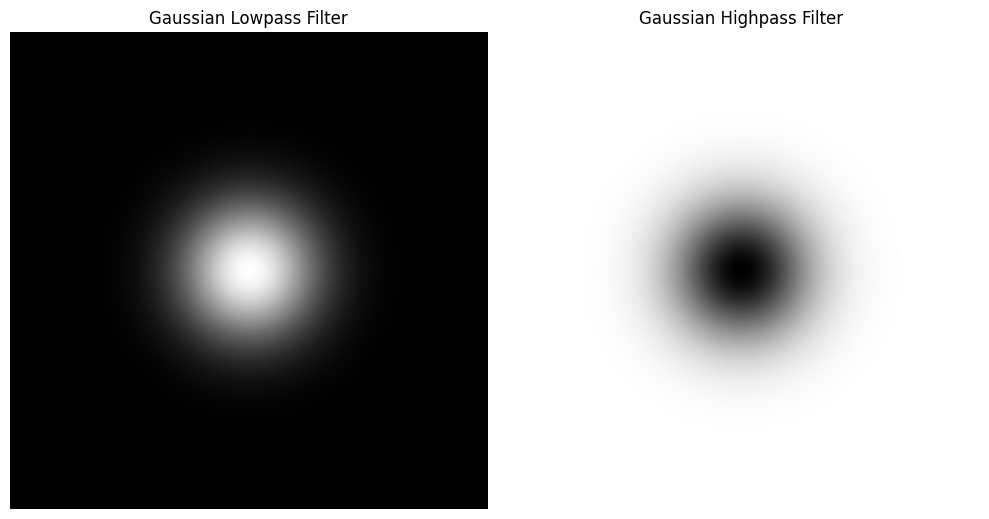

In [8]:
# Construct a Gaussian lowpas and a highpass filter
Hlpg = np.exp(-D**2/2/(0.2)**2)
Hhpg = 1 - Hlpg

# display the filter masks
fig, ax = plt.subplots(1, 2)

ax[0].imshow(Hlpg)#np.fft.fftshift(Hlpg))
ax[0].set_title('Gaussian Lowpass Filter')
ax[0].axis('off')

ax[1].imshow(Hhpg)#np.fft.fftshift(Hhpg))
ax[1].set_title('Gaussian Highpass Filter')
ax[1].axis('off')
fig.tight_layout()

**1.7. Perform Gaussian lowpass and highpass filtering to the original test image and display the magnitude of the resulting FTs in the same figure.**

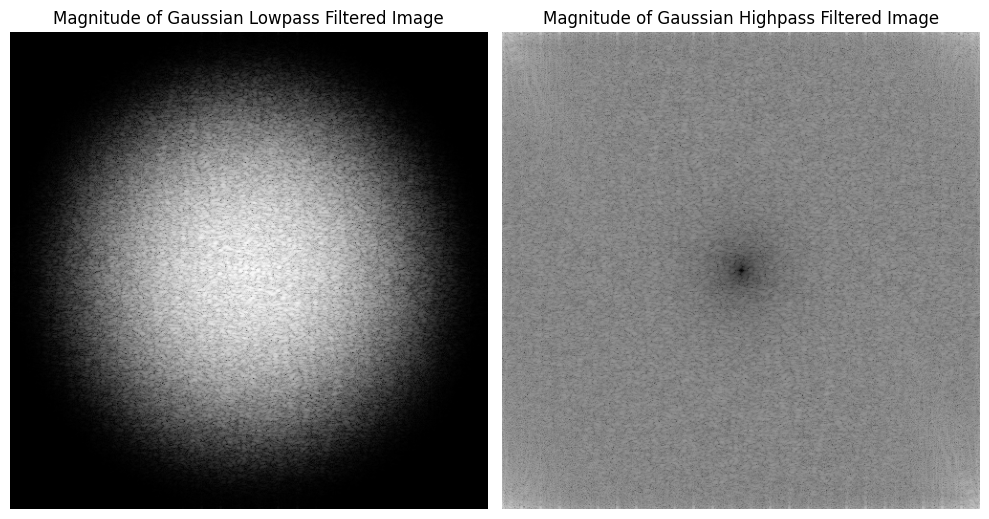

In [9]:
# apply gaussian lowpass and highpass filtering to the test image
gaussian_lowpass_filtered_image = fourier_transform*Hlpg
gaussian_highpass_filtered_image =  fourier_transform*Hhpg

magnitude_gaussian_lowpass_filtered = np.abs(gaussian_lowpass_filtered_image)
magnitude_gaussian_highpass_filtered = np.abs(gaussian_highpass_filtered_image)


# display the magnitude of the resulting FTs

fig, ax = plt.subplots(1, 2)

ax[0].imshow(np.log(magnitude_gaussian_lowpass_filtered + 1.0))
ax[0].set_title('Magnitude of Gaussian Lowpass Filtered Image')
ax[0].axis('off')

ax[1].imshow(np.log(magnitude_gaussian_highpass_filtered + 1.0))
ax[1].set_title('Magnitude of Gaussian Highpass Filtered Image')
ax[1].axis('off')
fig.tight_layout()

**1.8. Finally, reconstruct the filtered images like in step 4.5. and display the original image and the two Gaussian filtered images in the same figure.**

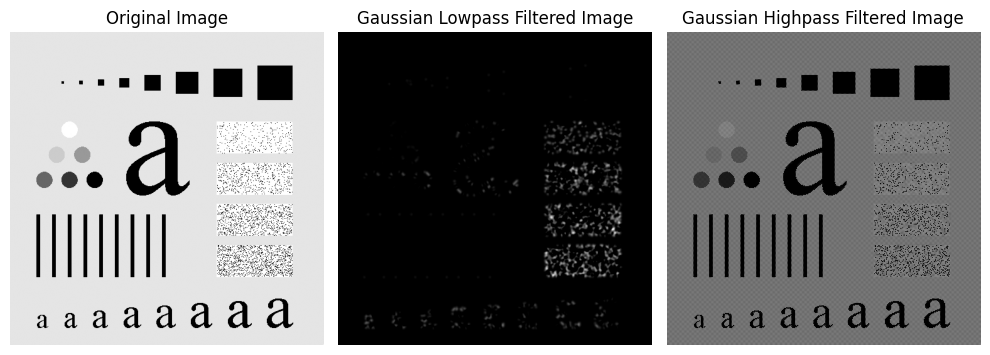

In [10]:
# reconstruct the filtered images 
gaussian_lowpass_reconstructed_filtered_image = fftpack.ifft2(fftpack.ifftshift(gaussian_lowpass_filtered_image))#np.fft.ifft2(np.fft.ifftshift(gaussian_lowpass_filtered_image))
gaussian_highpass_reconstructed_filtered_image =  fftpack.ifft2(fftpack.ifftshift(gaussian_highpass_filtered_image))#np.fft.ifft2(np.fft.ifftshift(gaussian_highpass_filtered_image))

# take the 'real' part of the resulting images due to possible round-off errors
gaussian_lowpass_reconstructed_real_image = gaussian_lowpass_reconstructed_filtered_image.real
gaussian_highpass_reconstructed_real_image = gaussian_highpass_reconstructed_filtered_image.real

# clip values beyond the uint8 range [0,255] 
gaussian_lowpass_reconstructed_real_clipped_image = gaussian_lowpass_reconstructed_real_image.clip(0,255)
gaussian_highpass_reconstructed_real_clipped_image = gaussian_highpass_reconstructed_real_image.clip(0,255)

# display the three images in the same figure
fig, ax = plt.subplots(1, 3)

ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(gaussian_lowpass_reconstructed_real_clipped_image)
ax[1].set_title('Gaussian Lowpass Filtered Image')
ax[1].axis('off')

ax[2].imshow(gaussian_highpass_reconstructed_real_clipped_image)
ax[2].set_title('Gaussian Highpass Filtered Image')
ax[2].axis('off')

fig.tight_layout()

**Do the unwanted artefacts appear in the Gaussian lowpass filtered image, why or why not?**

`Gaussian lowpass filter has a smooth roll-off at the cut-off frequency, which means that it attenuates high frequencies gradually instead of abruptly. This gradual attenuation reduces the likelihood of ringing artifacts in the filtered image. (Digital Image Processing book)`

**What kind of effect does Gaussian (and ideal) lowpass filtering have on images in general? Why? What about highpass filtering? Why?**

`Gaussian and ideal lowpass filters are used to reduce high-frequency noise in images while preserving important low-frequency information, while highpass filters are used to enhance edges and other high-frequency details in images by selectively amplifying high-frequency information. Gaussian filters do this without causing the ringing effects. (Digital Image Processing book)`

# Aftermath
Finally, fill your answers to the following questions:

**How much time did you need to complete this exercise?**

`Approximately 5 hours.`

**Did you experience any problems with the exercise? Was there enough help available? Should this notebook be more (or less) detailed?**

`Yes. There was enough help available. Clear instructions are also provided when reaching out for help.`

# References
`[1] Gonzalez, R. C., & Woods, R. E. (2008). Digital Image Processing. Prentice Hall.

[2] https://gist.github.com/jtheikkila/b102db02a548c708aa70e2ad01adc60c#file-dip-2023-lecture-04-ipynb`

# Submission

1. Before submitting your work, **check that your notebook (code) runs from scratch** and reproduces all the requested results by clicking on the menu `Kernel -> Restart & Run All`! Also, check that you have answered all the questions written in **bold**.
2. Clear all outputs and variables, etc. by click on the menu `Kernel -> Restart & Clear Output`. This may (or will) reduce the file size of your deliverable a lot! 
3. Rename this Jupyter notebook to **`DIP_PA3_[student number(s)].ipynb`** (e.g. `DIP_PA3_1234567.ipynb` if solo work or `DIP_PA3_1234567-7654321.ipynb` if pair work) and upload it as your submission to Moodle.